# Lab-4:
In this lab, we will examine some classifiers, and the regularization concept in the classification problem.
Also, we will see

### Objectives:
1. Lasso and Ridge
2. Naïve Bayes
3. KNN
4. Cross Validation

---
## Lasso and Ridge
Both models are the regularized forms of the linear regression.
Lass with L1 regularization and Ridge with L2 regularization.
Both act as a constraint region for the coefficients/weight, where they must reside in.

### Issues:
1. When to use Lasso?
<span style="color:blue">
    1. Used when there are only a few predictors actually impact the response.
    2. It can be used as a feature selection algorithm, with the appropriate
    value of lambda, a sparse model can be produced.

2. When to use Ridge?
<span style="color:blue">
Used when there are many of predictors, and most of them influence the response.

3. Since it is hard to decide the parameters influence, How we can decide which regularization? and decide the value of lambda?
<span style="color:blue">
Using the cross validation!

In [12]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import numpy as np

### Loading Boston dataset
Housing-Prices Values in Suburbs of Boston.

In [13]:
X, y = load_boston(return_X_y=True)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/8, random_state=123)

/home/iviosab/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

### Fitting both Lasso and Ridge
Task:

Fit two models: Lasso and Ridge - with the default alpha-.
Then print their coefficients and notice the difference.

In [14]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso()
ridge = Ridge()
lasso.fit(x_train, y_train)
ridge.fit(x_train, y_train)

print("Lasso Coefficient:", *lasso.coef_, sep='\n\t')
print("Ridge Coefficient:", *ridge.coef_, sep='\n\t')
print('Sum of lasso abs values:', np.sum(np.abs(lasso.coef_)))
print('Sum of ridge abs values:', np.sum(np.abs(ridge.coef_)))

Lasso Coefficient:
	-0.06296576330463614
	0.0350956639719025
	0.0
	0.0
	-0.0
	2.269791338462823
	0.0006779558466116866
	-0.6450657726354462
	0.19354572704933157
	-0.013508702669918599
	-0.6453458726466407
	0.0044904218480321285
	-0.6731506757847043
Ridge Coefficient:
	-0.11105798056135399
	0.03658528048290772
	0.04692128541593299
	0.60382413480135
	-6.974605652267609
	5.11864285160244
	-0.026987022704628987
	-1.2282427950710868
	0.24913980673174488
	-0.013989976538037296
	-0.8478133115629517
	0.006954220877156475
	-0.468816487085446
Sum of lasso abs values: 4.543637894220047
Sum of ridge abs values: 15.733580805702644


<span style="color:red">
Task: Let's try different values for alpha for Lasso and Ridge regressors then
plot the validation loss.

<Figure size 640x480 with 0 Axes>

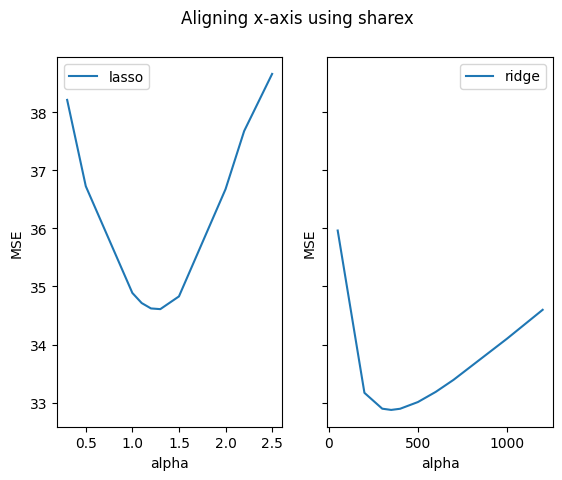

Best value of alpha for lasso: 1.3
Best value of alpha for ridge: 350


In [15]:
import matplotlib.pylab as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline

lasso_alphas = [0.3, 0.5, 1, 1.1, 1.2, 1.3, 1.5, 2, 2.2, 2.5]
ridge_alphas = [50, 200, 300, 350, 400, 500, 600, 700, 1000, 1200]
lasso_losses = []
ridge_losses = []
for i in range(len(lasso_alphas)):
    # Create a Lasso regressor with the alpha value.
    # Fit it to the training set, then get the prediction of the validation set (x_val).
    # calculate the mean squared error loss, then append it to the losses array
    lasso = Lasso(alpha=lasso_alphas[i])
    lasso.fit(x_train, y_train)
    y_pred = lasso.predict(x_val)
    mse = mean_squared_error(y_val, y_pred)
    lasso_losses.append(mse)

    ridge = Ridge(alpha=ridge_alphas[i])
    ridge.fit(x_train, y_train)
    y_pred = ridge.predict(x_val)
    mse = mean_squared_error(y_val, y_pred)
    ridge_losses.append(mse)

plt.suptitle('The effect of changing alpha on MSE for lasso and ridge')



# plt.figure(figsize=(10, 8))
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
fig.suptitle('Aligning x-axis using sharex')

ax1.plot(lasso_alphas, lasso_losses, label='lasso')
ax1.legend()
ax1.set(xlabel='alpha', ylabel='MSE')

ax2.plot(ridge_alphas, ridge_losses, label='ridge')
ax2.legend()
ax2.set(xlabel='alpha', ylabel='MSE')

plt.show()

lasso_best_alpha = lasso_alphas[np.argmin(lasso_losses)]
ridge_best_alpha = ridge_alphas[np.argmin(ridge_losses)]
print("Best value of alpha for lasso:", lasso_best_alpha)
print("Best value of alpha for ridge:", ridge_best_alpha)

Measuring the loss on the test set with Lasso and ridge regressors with the
best alpha.

In [16]:
lasso = Lasso(lasso_best_alpha)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
print("Lasso MSE on test set:", mean_squared_error(y_test, y_pred))

ridge = Ridge(ridge_best_alpha)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
print("Ridge MSE on test set:", mean_squared_error(y_test, y_pred))

Lasso MSE on test set: 31.953762880829828
Ridge MSE on test set: 30.119886865223595


## Loading the iris dataset
Dataset of 3 types/classes of flowers with 4 features. Suitable for classification!

In [17]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# We will show why we didn't split a validation set.

## Naïve Bayes
We will use the Gaussian Naïve Bayes, that deals -as a assumption- with the continous features as gaussian variables to compute their probability.

$$P(x_i|y) = \frac{1}{\sqrt{2\pi\sigma_y^2}}exp(-\frac{(x_i - \mu_y)^2}{2\sigma_y^2})$$

While $\mu_y$ and $\sigma_y^2$ are the mean and the variance of the feature $i$ for class $y$.

Note: The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of $P(x_i|y)$.

___
What are the pros and cons of Naive bayes classifier?

<span style="color:blue">
Pros:

1. Fast training time, as it needs only one pass through the dataset to compute
the posterior probabilities and the statistical info.
2. Fast prediction time, as all the posterior probabilities are calculated,
passing through the feature values is enough.
3. Interpretation, Since we know the contribution of each feature in the
prediction, it is easy to understand their influence on the preidiction.
4. Allows online learning. Check the documentation of $partial\_fit$ function
in the GaussianNB class.
5. Does not require and is not affected by feature scaling.

Cons:

1. The features' independence assumption doesn't usually hold in the real life, which make Naive Bayes less accurate than other ML algorithms.
2. If the test set has an un seen categorical feature, it will be assigned a
0 probability aka "Zero Frequency". Check "Laplace smoothing"
___

Let's train a naive-bayes model and check the test accuracy.


In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gauss_nb = GaussianNB()
gauss_nb.fit(x_train, y_train)
y_pred = gauss_nb.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.7833333333333333


## K nearest neighbour classifier
1. What are the pros and cons of KNN?

    <span style="color:blue">

   Pros:
    1. Simple to understand and interpret.
    2. Flexible as it can be used for classification and regression.
    3. No assumptions about dataset, so it is useful for example in nonlinear data.

  Cons:
    1. Computationally and memory expensive. As, it needs to store all the training data. The searching time could be logarithmic, if a tree was used in the storage.
    2. Sensitive to irrelevant features and the scale of the features. So, rescaling the features is important preprocessing step.
    3. In regression, it can't give a continuous prediction, as it can't predict any value outside the training set range.
    4. It doesn't scale good when the number of dimensions gets so big as the distance metric will converge to a constant value between any given examples.
         (so we may need to reduce dimensions first).

2. To increase the variance of KNN model, should we increase or decrease the K?
    <span style="color:blue">
    We should decrease the K value, as the model will be more sensitive to the training set.
    Very small value of  K (e.g., K = 1), will overfit the trainset and get training accuracy of 1.
    And a very big value of K (e.g., K = Inf), will make a very simple model and predict the majority class always.

___
Let's do the same with KNN classifier.


Rescale the features first.

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9861111111111112


Let's tune the hyperparameter $n\_neighbors$ in the KNN classifier object using the cross-validation.

___
## Cross Validation
Cross validation comes as an alternative for the validation set splitting.

Note: that's why we didn't make a validation set.

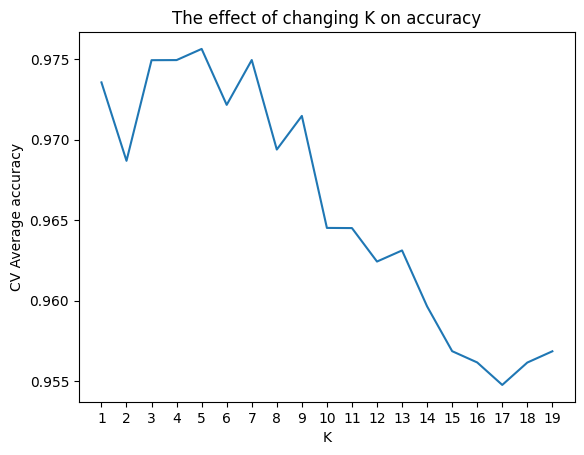

Best K: 5


In [21]:
from sklearn.model_selection import cross_val_score
import matplotlib.pylab as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
%matplotlib inline

Ks = list(range(1, 20))
cv_scores = []
for K in Ks:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, x_train, y_train,
                             cv=7, scoring='accuracy')
    avg_score = np.mean(scores)
    cv_scores.append(avg_score)

plt.title('The effect of changing K on accuracy')
plt.plot(Ks, cv_scores)
plt.xlabel('K')
plt.xticks(Ks)
plt.ylabel('CV Average accuracy')
plt.show()
print('Best K:', Ks[np.argmax(cv_scores)])

In KNN classifier, there are several hyperparamters to tune, tuning them one
by one is exhaustive approach. Let's try a better approach called GridSearchCV.

### GridSearchCV
In GridSearch Cross-validation, you give different values for each hyperparamter and it will try all combinations for you.
At the end, it will return the best combination of hyperparamters that got the best cross-validation score.

Task:
Use gridsearch to tune 3 hyperparameters:

1. $n\_neighbors$: [1, 2, . . ., 10]
2. $weights$: ['uniform', 'distance']
3. $metric$: ['euclidean', 'manhattan', 'chebyshev', 'cosine']

Check this [link](https://scikit-learn.org/stable/modules/grid_search.html)
for help.

Then measure the accuracy on the test set.

In [22]:
from sklearn.model_selection import GridSearchCV

# Modify the next lines to run GridSearchCV with cv=7
param_grid = {'n_neighbors':list(range(1, 11)),
              'weights':['uniform', 'distance'],
              'metric':['euclidean', 'manhattan', 'chebyshev', 'cosine']
              }

grid_search_clf = GridSearchCV(estimator=KNeighborsClassifier(),
                               cv=7, scoring='accuracy',
                               param_grid=param_grid
                               )

grid_search_clf.fit(x_train, y_train)
means = grid_search_clf.cv_results_['mean_test_score']
stds = grid_search_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))
print()
print("Best parameters set found on development set:")
print()
print(grid_search_clf.best_params_)

y_pred = grid_search_clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.974 (+/-0.021) for {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.974 (+/-0.021) for {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.969 (+/-0.018) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.974 (+/-0.021) for {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.975 (+/-0.018) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.975 (+/-0.018) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.975 (+/-0.012) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.978 (+/-0.019) for {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.976 (+/-0.013) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.977 (+/-0.011) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.972 (+/-0.016) for {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
0.978 (+/-0.010) for {'metric': 'euclidean', 'n_neighbors': 